In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [1]:
df = pd.read_csv('C:\\Users\\Win10\\Downloads\\Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [3]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [4]:
print(df.isnull().sum())
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['OrderDay'] = df['Order Date'].dt.day
df['OrderMonth'] = df['Order Date'].dt.month
df['OrderYear'] = df['Order Date'].dt.year

In [6]:
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df['Sub Category'] = le.fit_transform(df['Sub Category'])
df['City'] = le.fit_transform(df['City'])
df['Region'] = le.fit_transform(df['Region'])
df['State'] = le.fit_transform(df['State'])

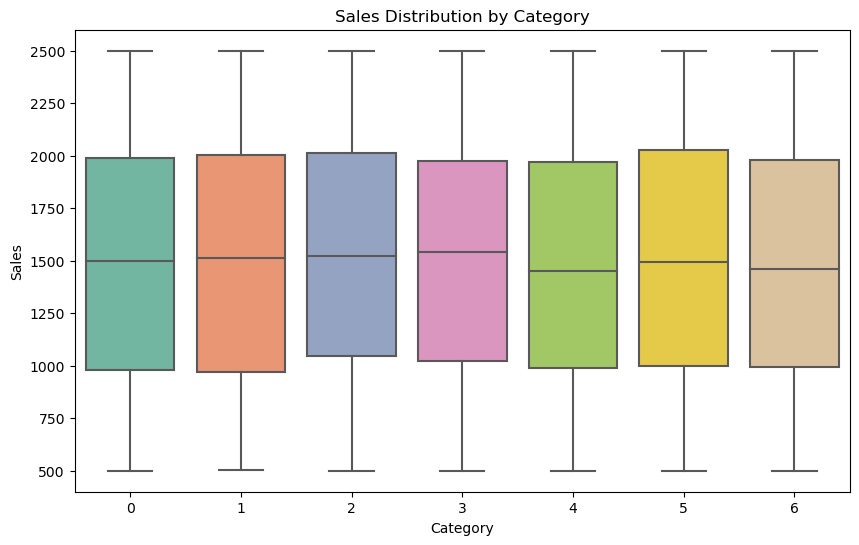

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y='Sales', data=df, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

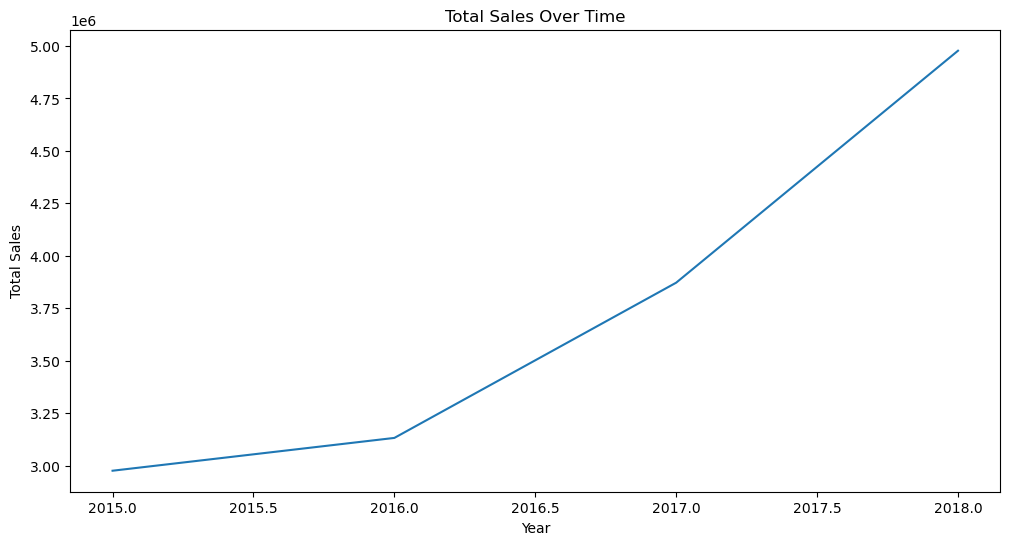

In [8]:
plt.figure(figsize=(12,6))
df.groupby('OrderYear')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

C:\Users\Win10\AppData\Local\Temp\ipykernel_20444\2111963587.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


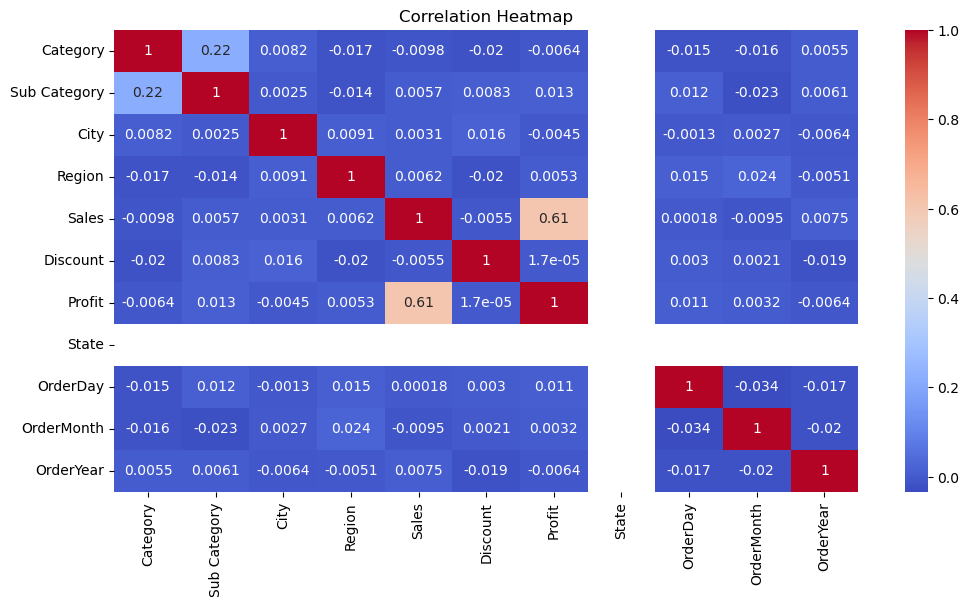

In [9]:
plt.figure(figsize=(12,6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

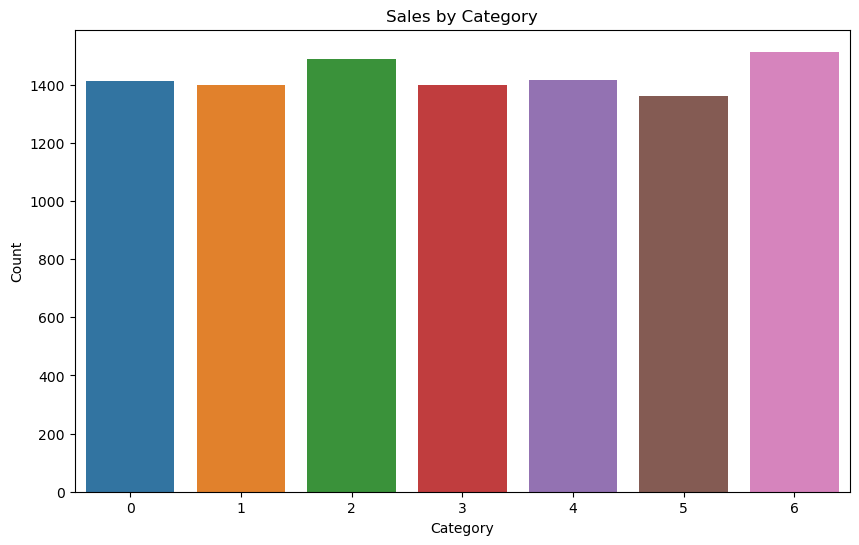

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='Category', data=df)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Sub Category', ylabel='count'>

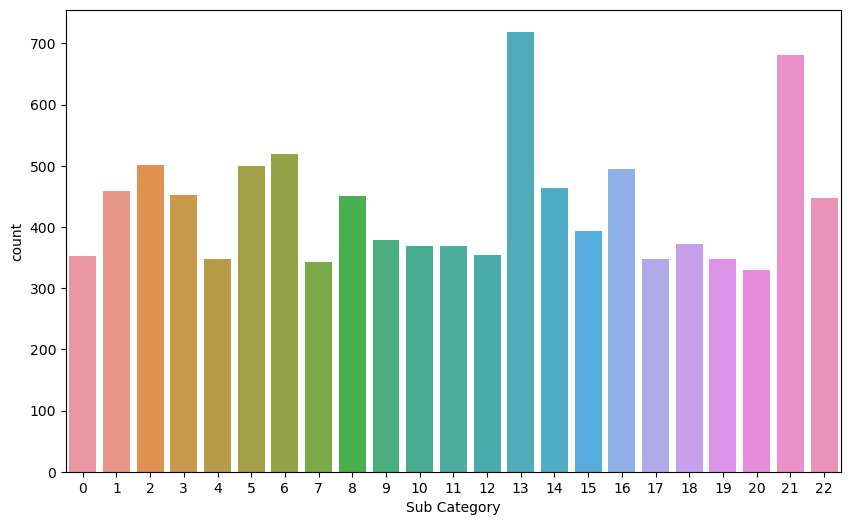

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sub Category', data=df)

<Axes: xlabel='Sub Category'>

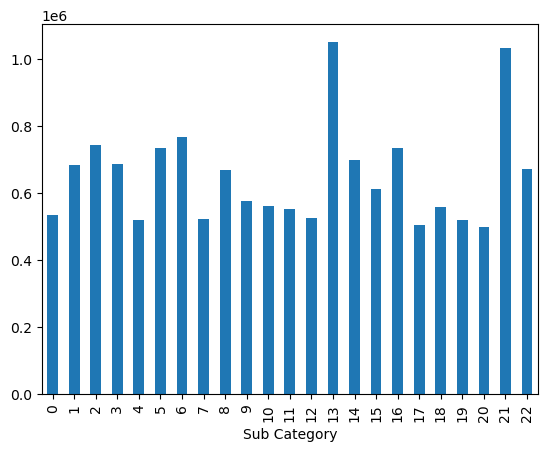

In [24]:
df.groupby('Sub Category')['Sales'].sum().plot(kind='bar')

<Axes: xlabel='City'>

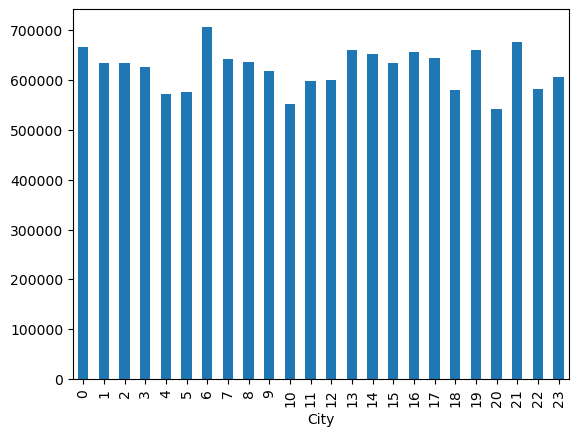

In [26]:
df.groupby('City')['Sales'].sum().plot(kind='bar')

<Axes: ylabel='Sales'>

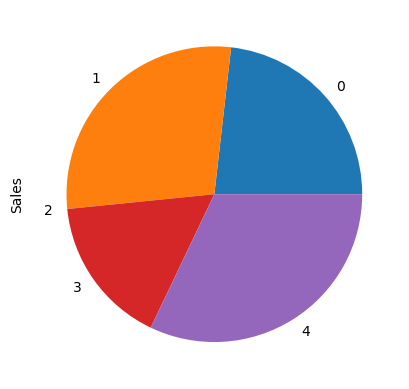

In [28]:
df.groupby('Region')['Sales'].sum().plot(kind='pie')

<Axes: xlabel='Discount', ylabel='Sales'>

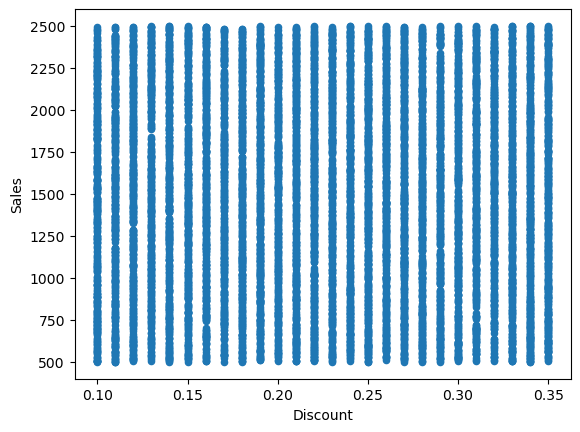

In [33]:
df.plot.scatter(x='Discount', y='Sales')

<Axes: xlabel='OrderYear'>

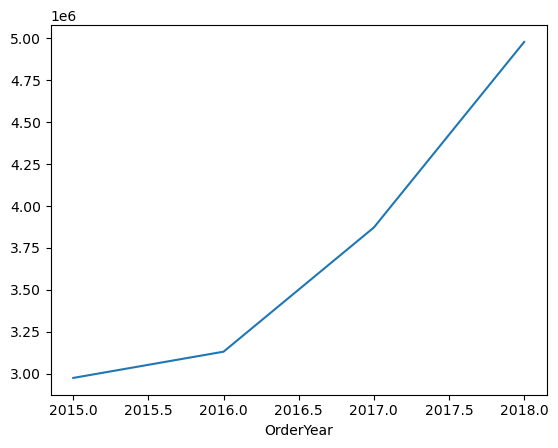

In [32]:
df.groupby('OrderYear')['Sales'].sum().plot(kind='line')

In [22]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State',
       'OrderDay', 'OrderMonth', 'OrderYear'],
      dtype='object')

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 213030.68736916443
R-squared: 0.35409350805366524


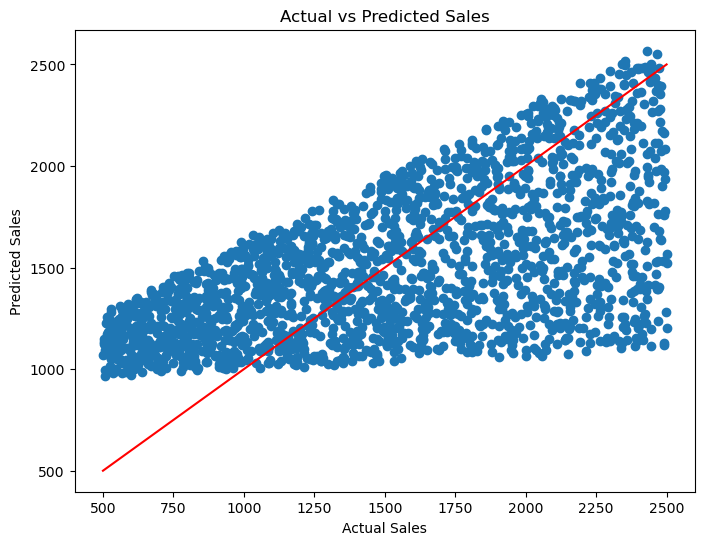

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()